<a href="https://colab.research.google.com/github/ecloguehwang/HSS/blob/master/%EA%B7%B8%EB%9E%98%ED%94%84_%EC%A7%84%ED%95%99%EA%B2%B0%EA%B3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#colab에서 matplotlib와 sns 라이브러리 그래프 한글을 깨지지 않게 하는 법: 이 코드실행하고 런타임(runtime) 다시 실행하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (3,909 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128208 files and di

In [1]:
import os
print(os.getcwd())

/content


In [ ]:
# 라이브러리 부르기
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import openpyxl
import csv

##  데이터 부르기 : 구글colab에 마운트(mount)하는 방법: 왼쪽 폴더아이콘을 누르기-눈동자 왼쪽 파일마운트 아이콘 클릭- /content/drive/MyDrive/python폴더의 susi_2021simple.csv파일을 불러옴
df = pd.read_csv('/content/drive/MyDrive/python/susi_jsi.csv', encoding = 'cp949')
#df = pd.read_csv('/content/drive/MyDrive/python/susi_jsi_noname.csv', encoding = 'cp949')
# 첫 5줄을 봅니다. 
df.head(4)

In [3]:
#matplotlib에서 한글구현
plt.rc('font', family='NanumBarunGothic')

#그래프 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
uni = ['서울대', '연세대', '고려대', '서강대', '성균관대', '한양대', '중앙대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

print("\n***2023학년도 등촌고 합격자수***")

for u in uni:
    df_주요대 = df[(df.대학 == u) & (df.최종 == '합')]
    df_주요대 = df_주요대[['수시정시', '학번', '대학', '최종']]
    
    num_수시 = len(df_주요대[df_주요대['수시정시'] == '수시'])
    num_정시 = len(df_주요대[df_주요대['수시정시'] == '정시'])
    
    print(u, "합격자수 - 수시:", str(num_수시) + "명,", "정시:", str(num_정시) + "명")


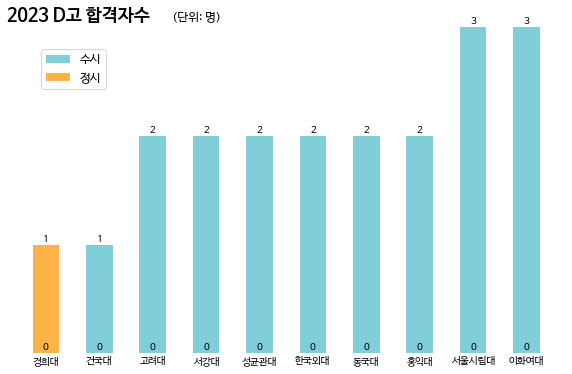

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/python/susi_jsi.csv', encoding='cp949')

uni = ['고려대', '서강대', '성균관대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

fig, ax = plt.subplots(figsize=(10, 6))

# 전체 그래프 테두리 제거
plt.box(False)

colors = ['#80CED7', '#FFB347']

# 대학 이름과 해당 대학의 수시 합격자 수를 담을 리스트 생성
name_num_su = []
# 대학 이름과 해당 대학의 정시 합격자 수를 담을 리스트 생성
name_num_jung = []

for i, u in enumerate(uni):
    df_주요대 = df[(df.대학 == u) & (df.최종 == '합')]
    df_주요대 = df_주요대[['수시정시', '학번', '대학', '최종']]
    
    num_수시 = len(df_주요대[df_주요대['수시정시'] == '수시'])
    num_정시 = len(df_주요대[df_주요대['수시정시'] == '정시'])

    # 수시 합격자 수와 정시 합격자 수를 리스트에 추가
    name_num_su.append((u, num_수시))
    name_num_jung.append((u, num_정시))

# 대학별 수시 합격자 수를 기준으로 정렬
name_num_su.sort(key=lambda x: x[1])

# 합격자 수 시각화
for i, (u, num_수시) in enumerate(name_num_su):
    num_정시 = dict(name_num_jung)[u]
    
    ax.bar(u, num_수시, color=colors[0], width=0.5, label='수시' if i == 0 else '')
    ax.bar(u, num_정시, bottom=num_수시, color=colors[1], width=0.5, label='정시' if i == 0 else '')
    
    # 합격자 수 값 표시
    ax.text(u, num_수시, num_수시, ha='center', va='bottom')
    ax.text(u, num_정시, num_정시, ha='center', va='bottom')

# 그래프 제목
ax.set_title('2023 D고 합격자수', fontsize=18, fontweight='bold', loc='left')

# 그래프 부제목
ax.text(0.34, 1.05, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)

# y축 눈금과 tick 제거
ax.set_yticks([])
ax.tick_params(axis='y', which='both', length=0)


# 범례 표시
#ax.legend(fontsize=12, loc='upper left')
ax.legend(fontsize=12, loc='upper left', bbox_to_anchor=(0.05, 0.95))


# X축 눈금과 tick 제거
ax.tick_params(axis='x', which='both', length=0)

#출력
plt.show()


In [ ]:
import matplotlib.pyplot as plt

uni = ['고려대', '서강대', '성균관대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

num_수시_list = []  # 수시 합격자수를 저장할 리스트
num_정시_list = []  # 정시 합격자수를 저장할 리스트

for u in uni:
    df_주요대 = df[(df.대학 == u) & (df.최종 == '합')]
    df_주요대 = df_주요대[['수시정시', '학번', '대학', '최종']]
    
    num_수시 = len(df_주요대[df_주요대['수시정시'] == '수시'])
    num_정시 = len(df_주요대[df_주요대['수시정시'] == '정시'])
    
    num_수시_list.append(num_수시)
    num_정시_list.append(num_정시)

# 누적 막대그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(uni, num_수시_list, label='수시')
plt.bar(uni, num_정시_list, bottom=num_수시_list, label='정시')
plt.xticks(rotation=45)
plt.yticks([]) #y축 제거
plt.title("2023학년도 등촌고 서울주요대 진학결과")
plt.legend()
plt.box(False)
plt.show()


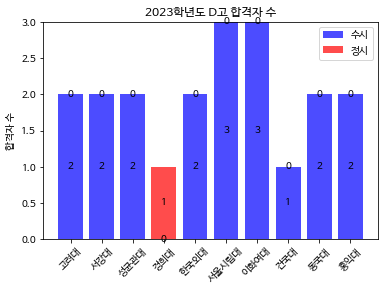

In [99]:
#예시
import matplotlib.pyplot as plt

# 그래프 데이터
universities = ['고려대', '서강대', '성균관대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']
num_admits_susi = [2, 2, 2, 0, 2, 3, 3, 1, 2, 2]
num_admits_jeongsi = [0, 0, 0, 1, 0, 0,0, 0, 0, 0 ]

# 막대 그래프 그리기
plt.bar(range(len(universities)), num_admits_susi, color='b', alpha=0.7, label='수시')
plt.bar(range(len(universities)), num_admits_jeongsi, bottom=num_admits_susi, color='r', alpha=0.7, label='정시')

# 막대 위에 합격자 수 표시하기
for i in range(len(universities)):
    plt.text(i, num_admits_susi[i]/2, str(num_admits_susi[i]), ha='center', va='center')
    plt.text(i, num_admits_susi[i]+num_admits_jeongsi[i]/2, str(num_admits_jeongsi[i]), ha='center', va='center')

# 그래프 레이블 설정
plt.xticks(range(len(universities)), universities)
plt.ylabel('합격자 수')
plt.title('2023학년도 D고 합격자 수')
plt.xticks(rotation=45)

# 범례 추가
plt.legend()

# 그래프 보여주기
plt.show()


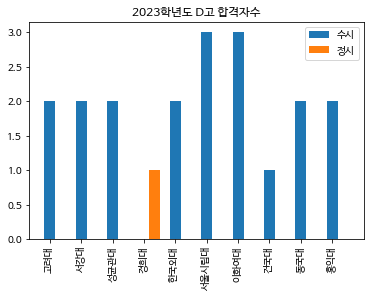

In [100]:
#비누적 막대그래프

import matplotlib.pyplot as plt

# 그래프 데이터 생성
data = []
for u in uni:
    df_주요대 = df[(df.대학 == u) & (df.최종 == '합')]
    df_주요대 = df_주요대[['수시정시', '학번', '대학', '최종']]
    
    num_수시 = len(df_주요대[df_주요대['수시정시'] == '수시'])
    num_정시 = len(df_주요대[df_주요대['수시정시'] == '정시'])
    
    data.append([num_수시, num_정시])

# 그래프 그리기
fig, ax = plt.subplots()
ax.set_title('2023학년도 D고 합격자수')

bar_width = 0.35
num_bars = len(uni)
x = range(num_bars)
for i in range(2):
    plt.bar([j + i * bar_width for j in x], [data[j][i] for j in range(num_bars)], 
            width=bar_width, label=['수시', '정시'][i], edgecolor=None)

ax.set_xticks(x)
ax.set_xticklabels(uni, rotation=90)

ax.legend()

plt.show()


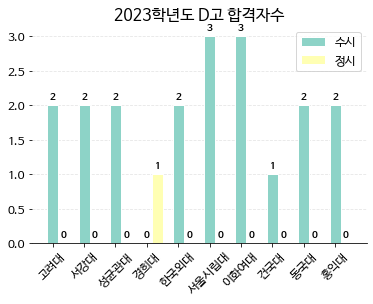

In [102]:
#비 누적 막대그래프
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/python/susi_jsi.csv", encoding='CP949')

uni = ['고려대', '서강대', '성균관대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

fig, ax = plt.subplots()

colors = ['#8dd3c7', '#ffffb3']

ind = np.arange(len(uni))
width = 0.35

for i, m in enumerate(['수시', '정시']):
    bar = ax.bar(ind + i*width, [len(df[(df['대학']==u) & (df['수시정시']==m) & (df['최종']=='합')]) for u in uni], width, color=colors[i], edgecolor='white', label=m)
    for b in bar:
        height = b.get_height()
        ax.annotate('{}'.format(height),
                    xy=(b.get_x() + b.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom', color='black', fontweight='bold', fontsize=10)

ax.set_xticks(ind)
ax.set_xticklabels(uni, fontsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.legend(fontsize=12, loc='upper right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)
plt.xticks(rotation=45)

plt.title('2023학년도 D고 합격자수', fontsize=16)
plt.show()


In [ ]:
ace = pd.DataFrame({'uni': ['고려대', '서강대', '성균관대', '경희대', '외대', '시립대', '이화여대', '건국대', '동국대', '홍익대'],
                      'num': [2, 2, 2, 1, 2, 3, 3, 1, 2, 2]})
ace_new = ace.sort_values(by = ['num'], ascending = [True])
print(ace_new)

In [ ]:
#합격자 막대그래프 그리기
uni = ['경희대', '건국대', '고려대', '서강대', '성균관대', '외대', '동국대', '홍익대', '시립대', '이화여대']
num = [1, 1, 2, 2, 2, 2, 2, 2, 2, 3]
plt.bar(uni, num, width =0.6)
plt.yticks([1, 1, 2, 2, 2, 2, 2, 2, 2, 3], label = ['1', '1', '2', '2', '2', '2', '2', '2', '2', '3'])
plt.title("2023학년도 D고 합격자수 (단위: 명)")
plt.show()


#자료: Matplotlib Tutorial https://wikidocs.net/92095

In [ ]:
#결측값 갯수 세는 법: 방법1
df.isnull().sum()

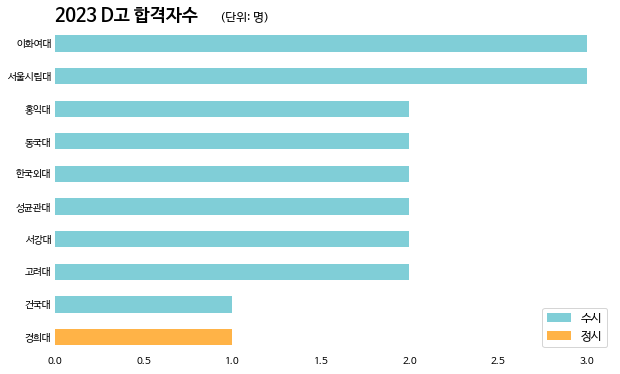

In [103]:
#가로 그래프로 출력하기
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/python/susi_jsi.csv', encoding='cp949')

uni = ['고려대', '서강대', '성균관대', '경희대', '한국외대', '서울시립대', '이화여대', '건국대', '동국대', '홍익대']

fig, ax = plt.subplots(figsize=(10, 6))
plt.box(False)

colors = ['#80CED7', '#FFB347']

df_주요대_list = []

for i, u in enumerate(uni):
    df_주요대 = df[(df.대학 == u) & (df.최종 == '합')]
    df_주요대 = df_주요대[['수시정시', '학번', '대학', '최종']]
    num_수시 = len(df_주요대[df_주요대['수시정시'] == '수시'])
    num_정시 = len(df_주요대[df_주요대['수시정시'] == '정시'])

    df_주요대_list.append({'대학': u, '수시': num_수시, '정시': num_정시})

# DataFrame으로 변환하여 y축 값을 기준으로 정렬
df_sorted = pd.DataFrame(df_주요대_list).sort_values(by=['수시', '정시'], ascending=[True, True])

# index를 대학으로 설정
df_sorted.set_index('대학', inplace=True)

# 정렬된 DataFrame으로부터 bar plot 생성
df_sorted.plot(kind='barh', stacked=True, color=colors, ax=ax)

# y축 제목
ax.set_ylabel('')

# 제목, 부제목
ax.set_title('2023 D고 합격자수', fontsize=18, fontweight='bold', loc='left')
ax.text(0.34, 1.05, '(단위: 명)', ha='center', va='top', transform=ax.transAxes, fontsize=12)

# y축 눈금과 tick 제거
ax.tick_params(axis='y', which='both', length=0)

# 범례
ax.legend(fontsize=12, loc='lower right')

# x축 눈금과 tick 제거
ax.tick_params(axis='x', which='both', length=0)

plt.show()
